In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings

# 한글 폰트 설정
plt.rcParams["font.family"] = [
    "DejaVu Sans",
    "AppleGothic",
    "Arial Unicode MS",
]
# 폰트 경고 무시
warnings.filterwarnings(
    "ignore", category=UserWarning, module="matplotlib.font_manager"
)

In [3]:
sns.set_style("whitegrid")
sns.set_palette("husl")

In [4]:
np.random.seed(42)
n_students = 200

students_data = pd.DataFrame(
    {
        "student_id": range(1, n_students + 1),
        "math": np.random.normal(75, 15, n_students),
        "science": np.random.normal(80, 12, n_students),
        "english": np.random.normal(70, 18, n_students),
        "grade": np.random.choice(
            ["A", "B", "C", "D"], n_students, p=[0.2, 0.3, 0.3, 0.2]
        ),
        "study_hours": np.random.gamma(2, 2, n_students),  # 감마 분포
        "gender": np.random.choice(["Male", "Female"], n_students),
        "school_type": np.random.choice(
            ["Public", "Private"], n_students, p=[0.7, 0.3]
        ),
    }
)

In [5]:
students_data[["math", "science", "english"]] = students_data[
    ["math", "science", "english"]
].clip(0, 100)

In [6]:
students_data["average"] = students_data[["math", "science", "english"]].mean(axis=1)

print("샘플 데이터 생성 완료!")
print("데이터 크기:", students_data.shape)
print("컬럼:", list(students_data.columns))

students_data.head()

샘플 데이터 생성 완료!
데이터 크기: (200, 9)
컬럼: ['student_id', 'math', 'science', 'english', 'grade', 'study_hours', 'gender', 'school_type', 'average']


,student_id,math,science,english,grade,study_hours,gender,school_type,average
0,1,82.450712,84.293448,41.300302,B,2.057004,Female,Private,69.348154
1,2,72.926035,86.729414,59.211250,C,3.658390,Male,Public,72.955566
2,3,84.715328,92.996615,70.094387,C,7.268396,Male,Public,82.602110
3,4,97.845448,92.645625,70.845651,C,1.827428,Male,Public,87.112241
4,5,71.487699,63.467968,61.898822,C,3.243807,Female,Private,65.618163


In [7]:
dates = pd.date_range("2023-01-01", periods=365, freq="D")
sales_data = pd.DataFrame(
    {
        "date": dates,
        "sales": 1000
        + 200 * np.sin(2 * np.pi * np.arange(365) / 365)
        + np.random.normal(0, 50, 365),
        "month": dates.month,
        "quarter": dates.quarter,
    }
)

In [8]:
sales_data

,date,sales,month,quarter
0,2023-01-01,1027.073136,1,1
1,2023-01-02,1041.400429,1,1
2,2023-01-03,978.058802,1,1
3,2023-01-04,880.771819,1,1
4,2023-01-05,986.448263,1,1
...,...,...,...,...
360,2023-12-27,874.173563,12,4
361,2023-12-28,1028.610598,12,4
362,2023-12-29,962.909657,12,4
363,2023-12-30,988.589014,12,4


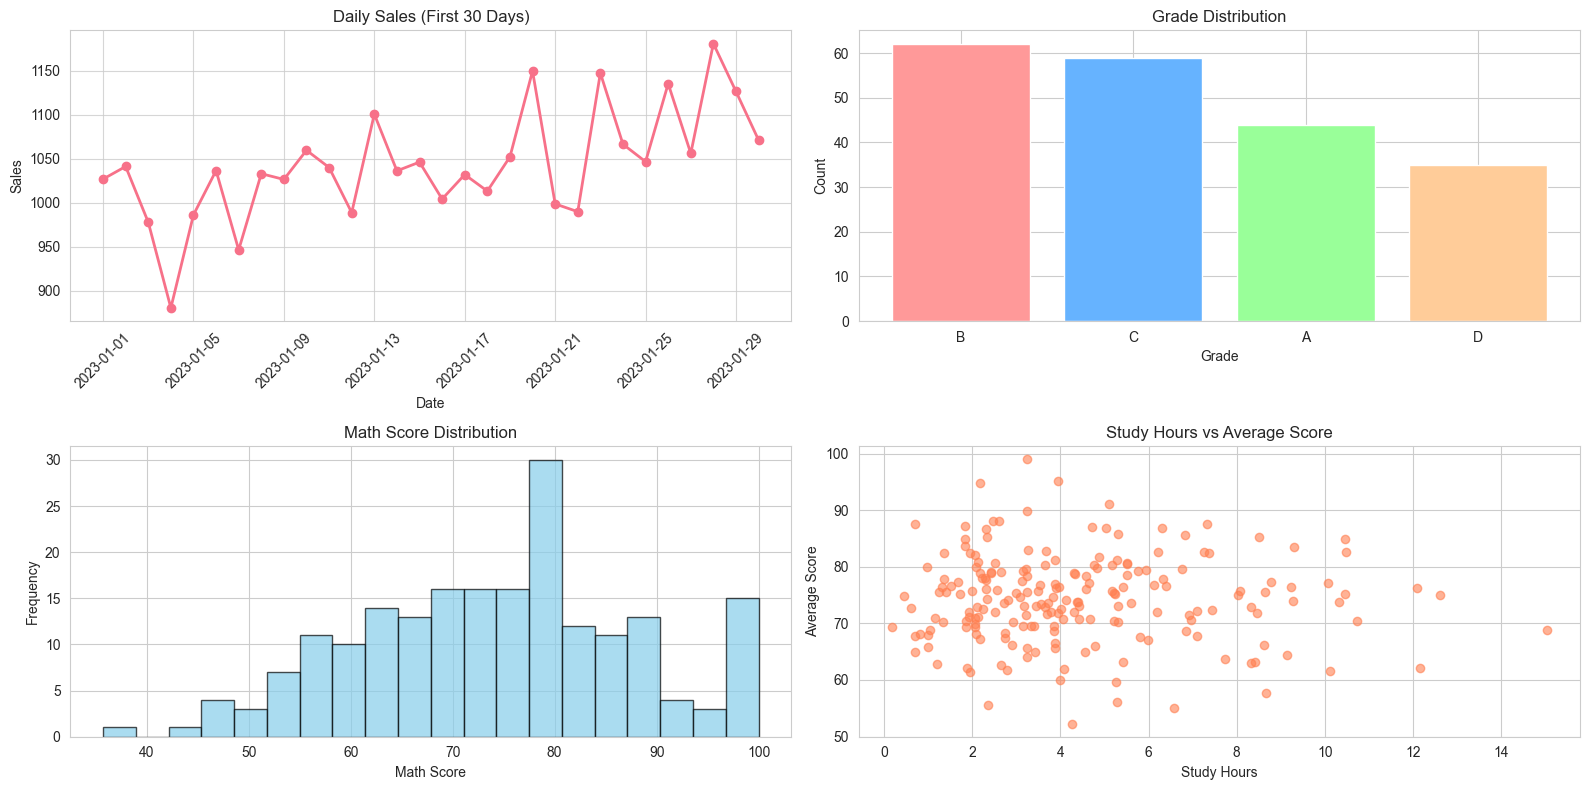

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(sales_data["date"][:30], sales_data["sales"][:30], marker="o", linewidth=2)
plt.title("Daily Sales (First 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True, alpha=0.8)
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
grade_counts = students_data["grade"].value_counts()
plt.bar(
    grade_counts.index,
    grade_counts.values,
    color=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],
)
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")

plt.subplot(2, 2, 3)
plt.hist(students_data["math"], bins=20, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.scatter(
    students_data["study_hours"], students_data["average"], alpha=0.6, c="coral"
)
plt.title("Study Hours vs Average Score")
plt.xlabel("Study Hours")
plt.ylabel("Average Score")

plt.tight_layout()
plt.show()

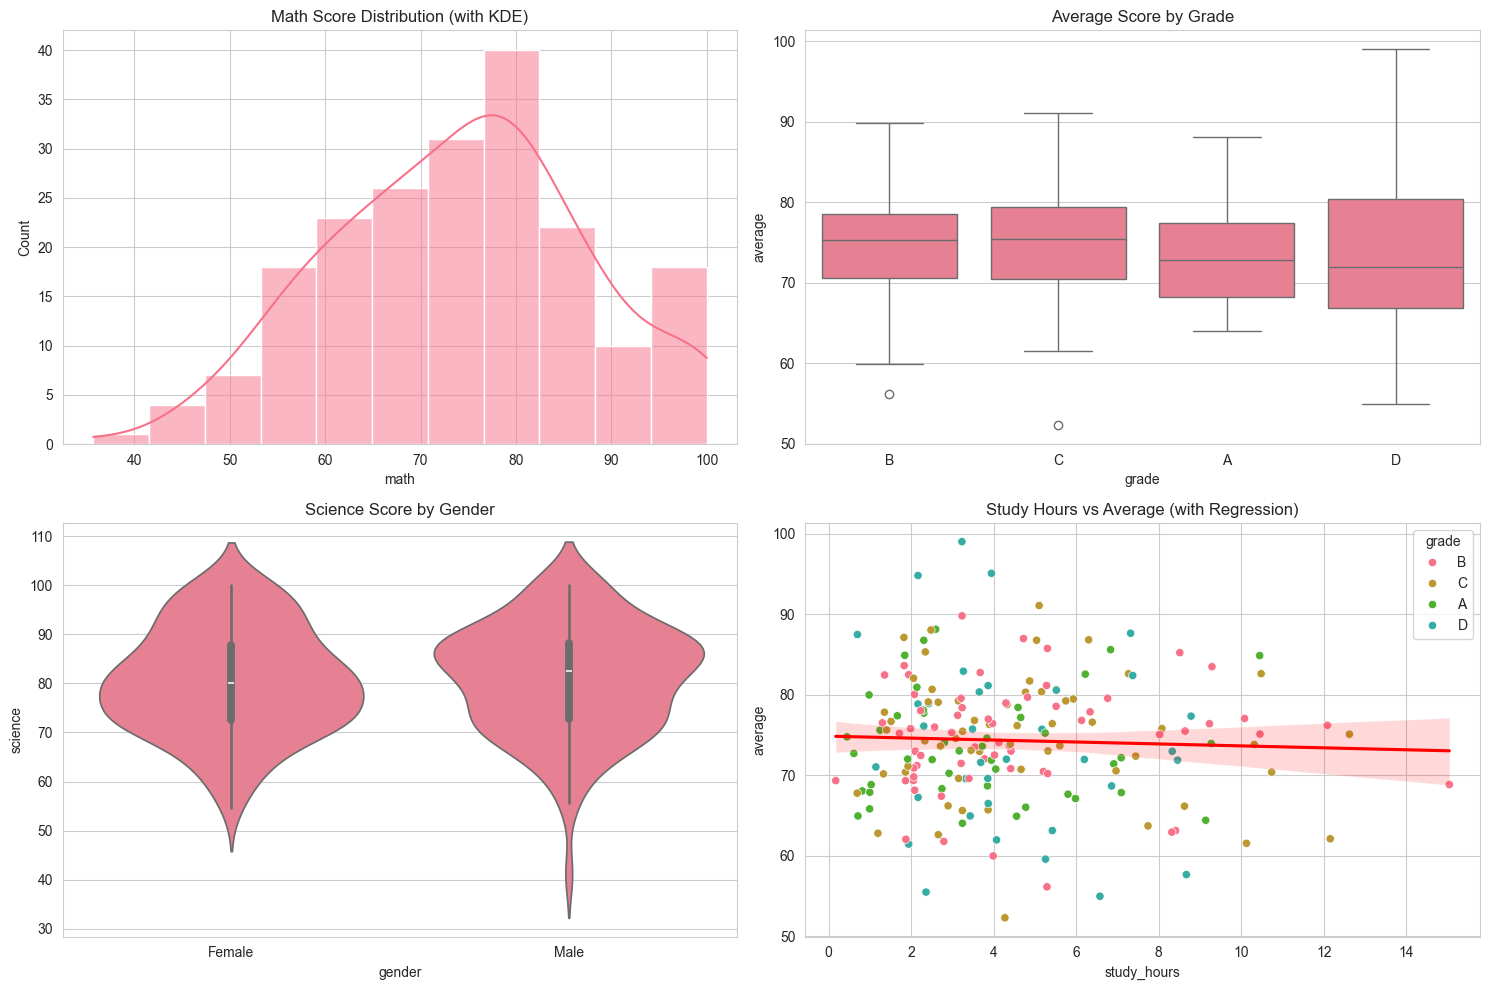

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 히스토그램 + 밀도 곡선
sns.histplot(data=students_data, x="math", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Math Score Distribution (with KDE)")

# 박스 플롯
sns.boxplot(data=students_data, x="grade", y="average", ax=axes[0, 1])
axes[0, 1].set_title("Average Score by Grade")

# 바이올린 플롯
sns.violinplot(data=students_data, x="gender", y="science", ax=axes[1, 0])
axes[1, 0].set_title("Science Score by Gender")

# 산점도 + 회귀선
sns.scatterplot(
    data=students_data, x="study_hours", y="average", hue="grade", ax=axes[1, 1]
)
sns.regplot(
    data=students_data,
    x="study_hours",
    y="average",
    scatter=False,
    ax=axes[1, 1],
    color="red",
)
axes[1, 1].set_title("Study Hours vs Average (with Regression)")

plt.tight_layout()
plt.show()

/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/2941174305.py:19: Us

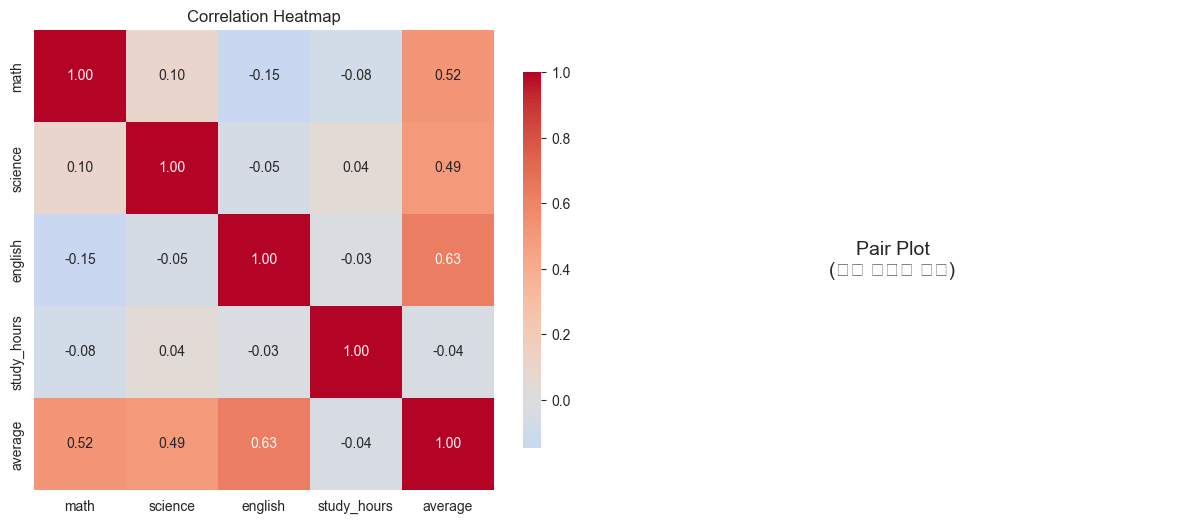

페어플롯 생성 중...


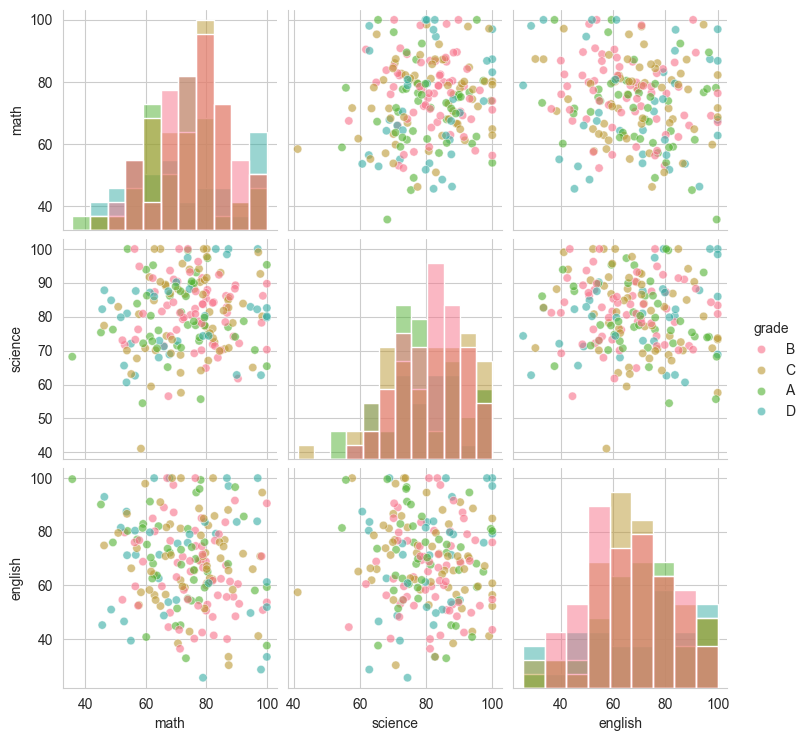

In [22]:
# 상관관계 행렬
correlation_matrix = students_data[
    ["math", "science", "english", "study_hours", "average"]
].corr()

plt.figure(figsize=(12, 5))

# 6-1. 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Heatmap")

# 6-2. 페어플롯 (일부 변수만)
plt.subplot(1, 2, 2)
# 페어플롯은 별도 그림으로 생성
plt.text(
    0.5,
    0.5,
    "Pair Plot\n(별도 창에서 확인)",
    ha="center",
    va="center",
    fontsize=14,
    transform=plt.gca().transAxes,
)
plt.axis("off")

plt.tight_layout()
plt.show()

# 페어플롯 (별도로 생성)
print("페어플롯 생성 중...")
sns.pairplot(
    students_data[["math", "science", "english", "grade"]],
    hue="grade",
    diag_kind="hist",
    plot_kws={"alpha": 0.6},
)
plt.show()

/var/folders/6d/92qnf3j91qg8btxjt2rdldkm0000gn/T/ipykernel_26830/3527767724.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=students_data, x='grade', y='average', hue='school_type', ci=95)


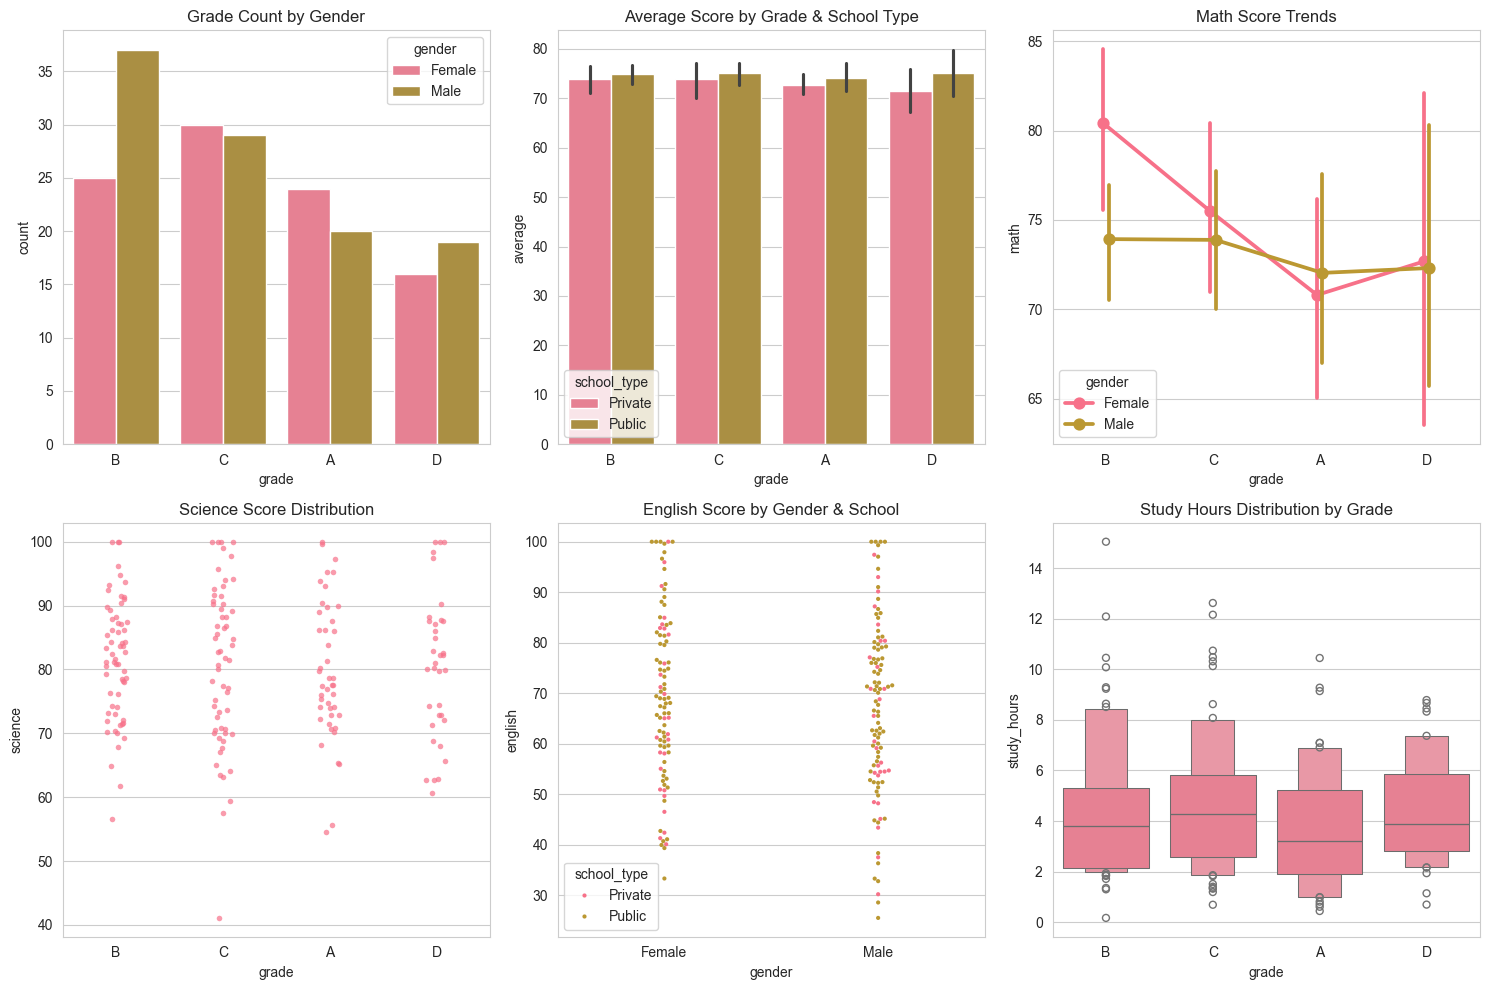

In [23]:
plt.figure(figsize=(15, 10))

# 7-1. 카운트 플롯
plt.subplot(2, 3, 1)
sns.countplot(data=students_data, x="grade", hue="gender")
plt.title("Grade Count by Gender")

# 7-2. 막대 플롯
plt.subplot(2, 3, 2)
sns.barplot(data=students_data, x="grade", y="average", hue="school_type", ci=95)
plt.title("Average Score by Grade & School Type")

# 7-3. 포인트 플롯
plt.subplot(2, 3, 3)
sns.pointplot(data=students_data, x="grade", y="math", hue="gender", dodge=True)
plt.title("Math Score Trends")

# 7-4. 스트립 플롯
plt.subplot(2, 3, 4)
sns.stripplot(
    data=students_data, x="grade", y="science", size=4, jitter=True, alpha=0.7
)
plt.title("Science Score Distribution")

# 7-5. 스웜 플롯
plt.subplot(2, 3, 5)
sns.swarmplot(data=students_data, x="gender", y="english", hue="school_type", size=3)
plt.title("English Score by Gender & School")

# 7-6. 박스엔플롯
plt.subplot(2, 3, 6)
sns.boxenplot(data=students_data, x="grade", y="study_hours")
plt.title("Study Hours Distribution by Grade")

plt.tight_layout()
plt.show()

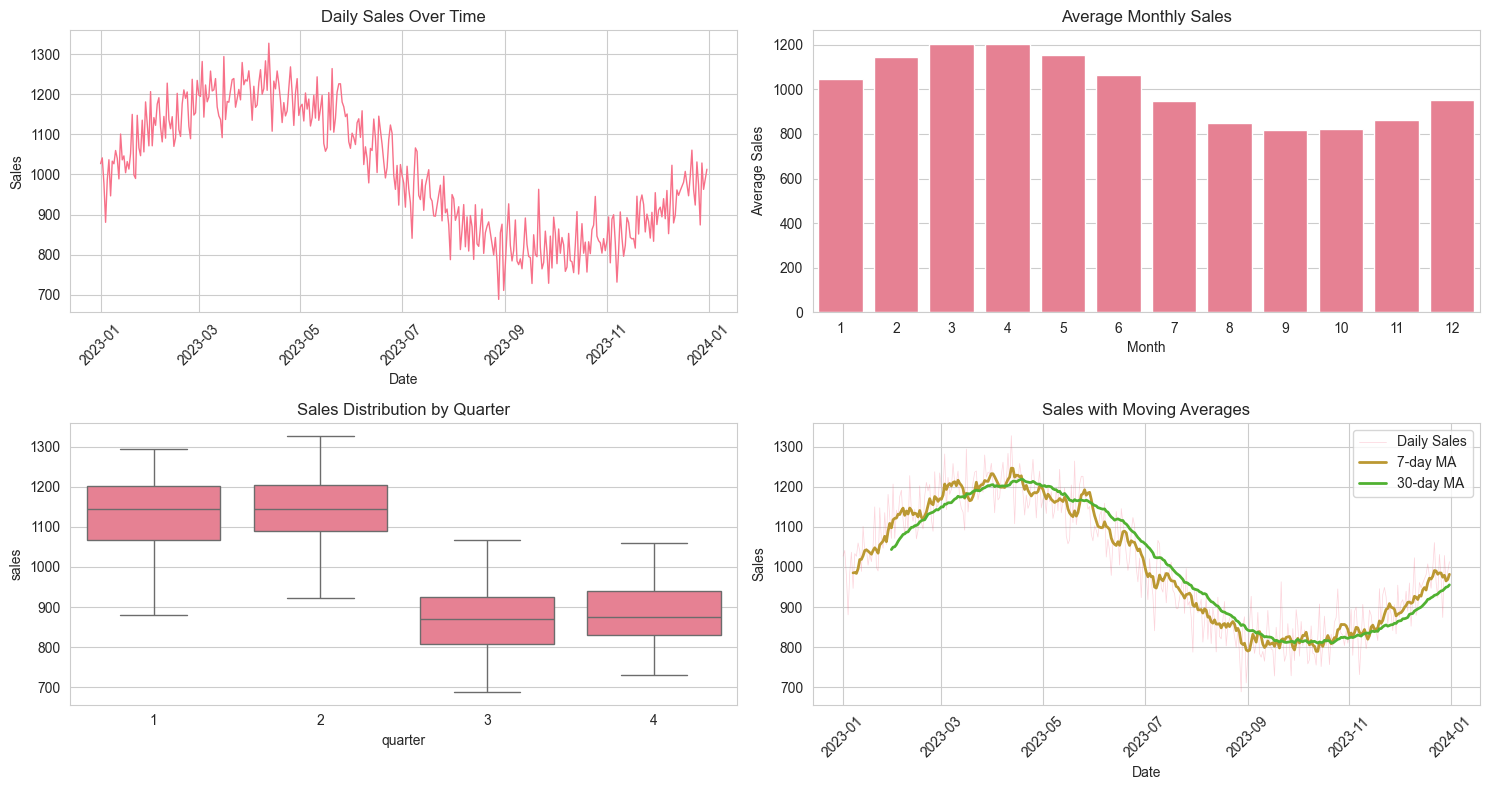

In [24]:
plt.figure(figsize=(15, 8))

# 8-1. 기본 시계열 플롯
plt.subplot(2, 2, 1)
plt.plot(sales_data["date"], sales_data["sales"], linewidth=1)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)

# 8-2. 월별 평균 매출
plt.subplot(2, 2, 2)
monthly_sales = sales_data.groupby("month")["sales"].mean()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")

# 8-3. 분기별 박스플롯
plt.subplot(2, 2, 3)
sns.boxplot(data=sales_data, x="quarter", y="sales")
plt.title("Sales Distribution by Quarter")

# 8-4. 이동평균
plt.subplot(2, 2, 4)
sales_data["sales_ma7"] = sales_data["sales"].rolling(window=7).mean()
sales_data["sales_ma30"] = sales_data["sales"].rolling(window=30).mean()

plt.plot(
    sales_data["date"],
    sales_data["sales"],
    alpha=0.3,
    label="Daily Sales",
    linewidth=0.5,
)
plt.plot(sales_data["date"], sales_data["sales_ma7"], label="7-day MA", linewidth=2)
plt.plot(sales_data["date"], sales_data["sales_ma30"], label="30-day MA", linewidth=2)
plt.title("Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()